In [1]:
# Boston house price data

from keras.datasets import boston_housing

(train_data, train_target), (test_data, test_target) = boston_housing.load_data()

57344/57026 [==============================] - 0s 3us/step


In [4]:
# Normalizing the data

mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data -= mean
train_data /= std

test_data -= mean
test_data /= std

In [12]:
# Model definition

from keras.models import Sequential
from keras.layers import Dense

def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(13, )))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    
    model.compile(optimizer='rmsprop' ,loss='mse', metrics=['mae'])
    
    return model

In [19]:
# K-fold validation

import numpy as np

k_number = 4
n_sample_number = len(train_data)//k_number
n_epochs = 100
all_scores = []

for i in range(k_number):
    val_data_fold = train_data[i*n_sample_number: (i+1)*n_sample_number]
    val_target_fold = train_target[i*n_sample_number: (i+1)*n_sample_number]
    train_data_fold = np.concatenate([train_data[:i*n_sample_number],train_data[(i+1)*n_sample_number:]], axis=0)
    train_target_fold = np.concatenate([train_target[:i*n_sample_number],train_target[(i+1)*n_sample_number:]], axis=0)
    
    model = build_model()
    model.fit(train_data_fold, train_target_fold,epochs=n_epochs, batch_size=1)
    val_mse, val_mae = model.evaluate(val_data_fold, val_target_fold, verbose=0)
    all_scores.append(val_mae)

Epoch 1/100
303/303 [==============================] - 1s 695us/step - loss: 375.9209 - mae: 16.6241
Epoch 2/100
303/303 [==============================] - 0s 773us/step - loss: 32.0749 - mae: 3.8770
Epoch 3/100
303/303 [==============================] - 0s 829us/step - loss: 21.2968 - mae: 3.1891
Epoch 4/100
303/303 [==============================] - 0s 800us/step - loss: 17.8595 - mae: 2.8387
Epoch 5/100
303/303 [==============================] - 0s 810us/step - loss: 14.5244 - mae: 2.5958
Epoch 6/100
303/303 [==============================] - 0s 815us/step - loss: 17.9251 - mae: 2.6314
Epoch 7/100
303/303 [==============================] - 0s 816us/step - loss: 13.9403 - mae: 2.4666
Epoch 8/100
303/303 [==============================] - 0s 819us/step - loss: 12.4801 - mae: 2.4447
Epoch 9/100
303/303 [==============================] - 0s 824us/step - loss: 8.9603 - mae: 2.1638
Epoch 10/100
303/303 [==============================] - 0s 825us/step - loss: 9.2625 - mae: 2.1755
Epoch 11/

303/303 [==============================] - 0s 728us/step - loss: 4.1683 - mae: 1.3885
Epoch 84/100
303/303 [==============================] - 0s 733us/step - loss: 5.1696 - mae: 1.3948
Epoch 85/100
303/303 [==============================] - 0s 748us/step - loss: 3.8903 - mae: 1.4132
Epoch 86/100
303/303 [==============================] - 0s 754us/step - loss: 4.0568 - mae: 1.4307
Epoch 87/100
303/303 [==============================] - 0s 747us/step - loss: 4.2506 - mae: 1.4215
Epoch 88/100
303/303 [==============================] - 0s 758us/step - loss: 4.4529 - mae: 1.4026
Epoch 89/100
303/303 [==============================] - 0s 746us/step - loss: 3.1681 - mae: 1.2297
Epoch 90/100
303/303 [==============================] - 0s 736us/step - loss: 3.2544 - mae: 1.2638
Epoch 91/100
303/303 [==============================] - 0s 759us/step - loss: 3.5270 - mae: 1.2960
Epoch 92/100
303/303 [==============================] - 0s 771us/step - loss: 3.6771 - mae: 1.2891
Epoch 93/100
303/303 [=

303/303 [==============================] - 0s 792us/step - loss: 3.7889 - mae: 1.4112
Epoch 66/100
303/303 [==============================] - 0s 788us/step - loss: 4.7924 - mae: 1.4692
Epoch 67/100
303/303 [==============================] - 0s 787us/step - loss: 5.0775 - mae: 1.5017
Epoch 68/100
303/303 [==============================] - 0s 782us/step - loss: 5.5117 - mae: 1.5684
Epoch 69/100
303/303 [==============================] - 0s 789us/step - loss: 4.2598 - mae: 1.3879
Epoch 70/100
303/303 [==============================] - 0s 796us/step - loss: 3.3194 - mae: 1.3602
Epoch 71/100
303/303 [==============================] - 0s 784us/step - loss: 4.5851 - mae: 1.5029
Epoch 72/100
303/303 [==============================] - 0s 786us/step - loss: 4.7545 - mae: 1.3112
Epoch 73/100
303/303 [==============================] - 0s 786us/step - loss: 3.1851 - mae: 1.2577
Epoch 74/100
303/303 [==============================] - 0s 803us/step - loss: 3.8179 - mae: 1.3952
Epoch 75/100
303/303 [=

303/303 [==============================] - 0s 733us/step - loss: 5.3695 - mae: 1.5844
Epoch 48/100
303/303 [==============================] - 0s 753us/step - loss: 4.4252 - mae: 1.5407
Epoch 49/100
303/303 [==============================] - 0s 783us/step - loss: 4.7658 - mae: 1.5351
Epoch 50/100
303/303 [==============================] - 0s 814us/step - loss: 4.8427 - mae: 1.5566
Epoch 51/100
303/303 [==============================] - 0s 820us/step - loss: 6.4517 - mae: 1.6208
Epoch 52/100
303/303 [==============================] - 0s 802us/step - loss: 4.6771 - mae: 1.5514
Epoch 53/100
303/303 [==============================] - 0s 832us/step - loss: 6.2083 - mae: 1.6194
Epoch 54/100
303/303 [==============================] - 0s 806us/step - loss: 4.5226 - mae: 1.4522
Epoch 55/100
303/303 [==============================] - 0s 794us/step - loss: 4.8053 - mae: 1.5245
Epoch 56/100
303/303 [==============================] - 0s 829us/step - loss: 5.1272 - mae: 1.7256
Epoch 57/100
303/303 [=

303/303 [==============================] - 0s 766us/step - loss: 6.2820 - mae: 1.7773
Epoch 30/100
303/303 [==============================] - 0s 784us/step - loss: 8.4093 - mae: 1.8935
Epoch 31/100
303/303 [==============================] - 0s 776us/step - loss: 11.1303 - mae: 2.0493
Epoch 32/100
303/303 [==============================] - 0s 803us/step - loss: 7.2627 - mae: 1.8612
Epoch 33/100
303/303 [==============================] - 0s 797us/step - loss: 5.3555 - mae: 1.5679
Epoch 34/100
303/303 [==============================] - 0s 819us/step - loss: 5.8145 - mae: 1.6378
Epoch 35/100
303/303 [==============================] - 0s 815us/step - loss: 6.5198 - mae: 1.6904
Epoch 36/100
303/303 [==============================] - 0s 818us/step - loss: 6.8877 - mae: 1.7410
Epoch 37/100
303/303 [==============================] - 0s 782us/step - loss: 6.6061 - mae: 1.6824
Epoch 38/100
303/303 [==============================] - 0s 802us/step - loss: 6.7569 - mae: 1.7746
Epoch 39/100
303/303 [

In [16]:
all_scores

[2.075305223464966, 2.382875442504883, 2.9652905464172363, 2.2522614002227783]

In [20]:
# saving the validation logs at each fold

num_epochs = 500
k = 4
all_mae_histories = []
for i in range(k):
    print("processing fold #", i)
    val_data_fold = train_data[i*n_sample_number: (i+1)*n_sample_number]
    val_target_fold = train_target[i*n_sample_number: (i+1)*n_sample_number]
    train_data_fold = np.concatenate([train_data[:i*n_sample_number],train_data[(i+1)*n_sample_number:]], axis=0)
    train_target_fold = np.concatenate([train_target[:i*n_sample_number],train_target[(i+1)*n_sample_number:]], axis=0)
    
    model = build_model()
    history = model.fit(train_data_fold, train_target_fold, verbose=0, epochs=num_epochs,
              validation_data=(val_data_fold, val_target_fold))
    mae_history = history.history['mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [23]:
# Building the history of successive mean K-fold validation scores

average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

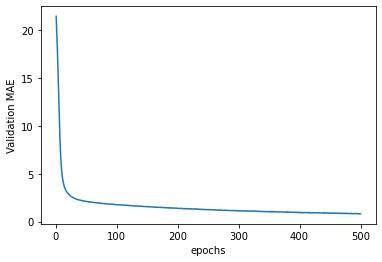

In [37]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('epochs')
plt.ylabel('Validation MAE')
plt.show()

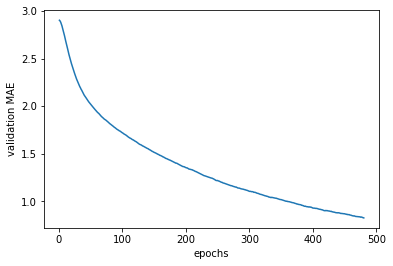

In [50]:
# better plotting

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous*factor + point*(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
    
smooth_mae_history = smooth_curve(average_mae_history[20:])

plt.clf()
plt.plot(range(1, len(smooth_mae_history)+1), smooth_mae_history)
plt.xlabel('epochs')
plt.ylabel('validation MAE')
plt.show()

In [51]:
# final model 

model = build_model()

model.fit(train_data, train_target, epochs=410, verbose=0, batch_size=16)

In [52]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_target)

4/4 [==============================] - 0s 961us/step - loss: 12.2403 - mae: 2.3511


In [53]:
test_mae_score

2.351147174835205